'lc' Datasets and Options
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.4 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.4,<2.5"

As always, let's do imports and initialize a logger and a new Bundle.

In [2]:
import phoebe
from phoebe import u # units

logger = phoebe.logger()

b = phoebe.default_binary()

Dataset Parameters
--------------------------

Let's add a lightcurve dataset to the Bundle (see also the [lc API docs](../api/phoebe.parameters.dataset.lc.md)).  Some parameters are only visible based on the values of other parameters, so we'll pass `check_visible=False` (see the [filter API docs](../api/phoebe.parameters.ParameterSet.filter.md) for more details).  These visibility rules will be explained below.

In [3]:
b.add_dataset('lc')
print(b.get_dataset(kind='lc', check_visible=False))

ParameterSet: 30 parameters
               times@lc01@dataset: [] d
              fluxes@lc01@dataset: [] W / m2
            passband@lc01@dataset: Johnson:V
    intens_weighting@lc01@dataset: energy
       compute_times@lc01@dataset: [] d
C     compute_phases@lc01@dataset: []
           phases_t0@lc01@dataset: t0_supconj
        mask_enabled@lc01@dataset: True
         mask_phases@lc01@dataset: []
        solver_times@lc01@dataset: auto
              sigmas@lc01@dataset: [] W / m2
          sigmas_lnf@lc01@dataset: -inf
          pblum_mode@lc01@dataset: component-coupled
     pblum_component@lc01@dataset: primary
       pblum_dataset@lc01@dataset: 
              pbflux@lc01@dataset: 1.0 W / m2
             l3_mode@lc01@dataset: flux
                  l3@lc01@dataset: 0.0 W / m2
             l3_frac@lc01@dataset: 0.0
             exptime@lc01@dataset: 0.0 s
     ld_mode@primary@lc01@dataset: interp
   ld_mode@secondary@lc01@dataset: interp
     ld_func@primary@lc01@dataset: logarithmi

### times

In [4]:
print(b.get_parameter(qualifier='times'))

Parameter: times@lc01@dataset
                       Qualifier: times
                     Description: Observed times
                           Value: [] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



### fluxes

In [5]:
print(b.get_parameter(qualifier='fluxes'))

Parameter: fluxes@lc01@dataset
                       Qualifier: fluxes
                     Description: Observed flux
                           Value: [] W / m2
                  Constrained by: 
                      Constrains: None
                      Related to: None



### sigmas

In [6]:
print(b.get_parameter(qualifier='sigmas'))

Parameter: sigmas@lc01@dataset
                       Qualifier: sigmas
                     Description: Observed uncertainty on flux
                           Value: [] W / m2
                  Constrained by: 
                      Constrains: None
                      Related to: None



### compute_times / compute_phases

See the [Compute Times & Phases tutorial](compute_times_phases.ipynb).

In [7]:
print(b.get_parameter(qualifier='compute_times'))

Parameter: compute_times@lc01@dataset
                       Qualifier: compute_times
                     Description: Times to use during run_compute.  If empty, will use times parameter
                           Value: [] d
                  Constrained by: 
                      Constrains: compute_phases@lc01@dataset
                      Related to: period@binary@component, dpdt@binary@component, phases_t0@lc01@dataset, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component, compute_phases@lc01@dataset



In [8]:
print(b.get_parameter(qualifier='compute_phases', context='dataset'))

Parameter: compute_phases@lc01@dataset
                       Qualifier: compute_phases
                     Description: Phases associated with compute_times.
                           Value: []
                  Constrained by: compute_times@lc01@dataset, period@binary@component, dpdt@binary@component, phases_t0@lc01@dataset, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component
                      Constrains: None
                      Related to: compute_times@lc01@dataset, period@binary@component, dpdt@binary@component, phases_t0@lc01@dataset, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component



In [9]:
print(b.get_parameter(qualifier='phases_t0'))

Parameter: phases_t0@lc01@dataset
                       Qualifier: phases_t0
                     Description: t0 to use when converting between compute_times and compute_phases as well as when applying mask_phases
                           Value: t0_supconj
                         Choices: t0_supconj, t0_perpass, t0_ref
                  Constrained by: 
                      Constrains: compute_phases@lc01@dataset
                      Related to: compute_times@lc01@dataset, period@binary@component, dpdt@binary@component, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component, compute_phases@lc01@dataset
                 Only visible if: hierarchy.is_meshable:False



### ld_mode

See the [Limb Darkening tutorial](./limb_darkening.ipynb)

In [10]:
print(b.get_parameter(qualifier='ld_mode', component='primary'))

Parameter: ld_mode@primary@lc01@dataset
                       Qualifier: ld_mode
                     Description: Mode to use for limb-darkening
                           Value: interp
                         Choices: interp, lookup, manual
                  Constrained by: 
                      Constrains: None
                      Related to: None



### ld_func

`ld_func` will only be available if `ld_mode` is not 'interp', so let's set it to 'lookup'.  See the [limb darkening tutorial](./limb_darkening.ipynb) for more details.

In [11]:
b.set_value('ld_mode', component='primary', value='lookup')

In [12]:
print(b.get_parameter(qualifier='ld_func', component='primary'))

Parameter: ld_func@primary@lc01@dataset
                       Qualifier: ld_func
                     Description: Limb darkening model
                           Value: logarithmic
                         Choices: linear, logarithmic, quadratic, square_root, power
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: ld_mode:lookup|manual



### ld_coeffs_source

`ld_coeffs_source` will only be available if `ld_mode` is 'lookup'.  See the [limb darkening tutorial](./limb_darkening.ipynb) for more details.

In [13]:
print(b.get_parameter(qualifier='ld_coeffs_source', component='primary'))

Parameter: ld_coeffs_source@primary@lc01@dataset
                       Qualifier: ld_coeffs_source
                     Description: Source for limb darkening coefficients ('auto' to interpolate from the applicable table according to the 'atm' parameter, or the name of a specific atmosphere table)
                           Value: auto
                         Choices: auto, ck2004, phoenix
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: ld_mode:lookup



### ld_coeffs

`ld_coeffs` will only be available if `ld_mode` is set to 'manual'.  See the [limb darkening tutorial](./limb_darkening.ipynb) for more details.

In [14]:
b.set_value('ld_mode', component='primary', value='manual')

In [15]:
print(b.get_parameter(qualifier='ld_coeffs', component='primary'))

Parameter: ld_coeffs@primary@lc01@dataset
                       Qualifier: ld_coeffs
                     Description: Limb darkening coefficients
                           Value: [0.5 0.5]
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: ld_mode:manual



### passband

See the [Atmospheres & Passbands tutorial](./atm_passbands.ipynb)

In [16]:
print(b.get_parameter(qualifier='passband'))

Parameter: passband@lc01@dataset
                       Qualifier: passband
                     Description: Passband
                           Value: Johnson:V
                         Choices: Tycho:B, LSST:r, Johnson:U, BRITE:blue, Johnson:I, Gaia:RVS, Stromgren:y, Johnson:V, Hipparcos:Hp, Stromgren:b, BRITE:red, TESS:T, Johnson:B, LSST:z, Kepler:mean, LSST:g, Cousins:I, Gaia:G, Johnson:R, LSST:i, KELT:R, Cousins:R, Gaia:BP, Stromgren:u, LSST:y3, Bolometric:900-40000, Tycho:V, LSST:u, Gaia:RP, Stromgren:v
                  Constrained by: 
                      Constrains: None
                      Related to: None



### intens_weighting

See the [Intensity Weighting tutorial](intens_weighting)

In [17]:
print(b.get_parameter(qualifier='intens_weighting'))

Parameter: intens_weighting@lc01@dataset
                       Qualifier: intens_weighting
                     Description: Whether passband intensities are weighted by energy or photons
                           Value: energy
                         Choices: energy, photon
                  Constrained by: 
                      Constrains: None
                      Related to: None



### pblum_mode

See the [Passband Luminosity tutorial](pblum)

In [18]:
print(b.get_parameter(qualifier='pblum_mode'))

Parameter: pblum_mode@lc01@dataset
                       Qualifier: pblum_mode
                     Description: Mode for scaling passband luminosities
                           Value: component-coupled
                         Choices: decoupled, component-coupled, dataset-coupled, dataset-scaled, absolute
                  Constrained by: 
                      Constrains: None
                      Related to: None



### pblum_component

`pblum_component` is only available if `pblum_mode` is set to 'component-coupled'.  See the [passband luminosity tutorial](./pblum.ipynb) for more details.

In [19]:
b.set_value('pblum_mode', value='component-coupled')

In [20]:
print(b.get_parameter(qualifier='pblum_component'))

Parameter: pblum_component@lc01@dataset
                       Qualifier: pblum_component
                     Description: Which component's pblum will be provided
                           Value: primary
                         Choices: primary, secondary
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: pblum_mode:component-coupled



### pblum_dataset

`pblum_dataset` is only available if `pblum_mode` is set to 'dataset-coupled'.  In this case we'll get a warning because there is only one dataset.  See the [passband luminosity tutorial](./pblum.ipynb) for more details.

In [21]:
b.set_value('pblum_mode', value='dataset-coupled')

Thu, 17 Sep 2020 11:04 BUNDLE       WARNING cannot set pblum_mode@lc01='dataset-coupled' when there are no other valid datasets.  Change pblum_mode or add another dataset.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 11:04 BUNDLE       WARNING cannot set pblum_dataset@lc01='None' as that dataset has pblum_mode@None='dataset-coupled'.  Perhaps set to '' instead.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


In [22]:
print(b.get_parameter(qualifier='pblum_dataset'))

Parameter: pblum_dataset@lc01@dataset
                       Qualifier: pblum_dataset
                     Description: Dataset with which to couple luminosities based on color
                           Value: 
                         Choices: 
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: pblum_mode:dataset-coupled



### pblum

`pblum` is only available if `pblum_mode` is set to 'decoupled' (in which case there is a `pblum` entry per-star) or 'component-coupled' (in which case there is only an entry for the star chosen by `pblum_component`).  See the [passband luminosity tutorial](./pblum.ipynb) for more details.

In [23]:
b.set_value('pblum_mode', value='decoupled')

In [24]:
print(b.get_parameter(qualifier='pblum', component='primary'))

Parameter: pblum@primary@lc01@dataset
                       Qualifier: pblum
                     Description: Passband luminosity (defined at t0)
                           Value: 12.566370614359172 W
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: [component]pblum_mode:decoupled||[component]pblum_mode:component-coupled,[component]pblum_component:<component>



### l3_mode

See the ["Third" Light tutorial](./l3.ipynb)

In [25]:
print(b.get_parameter(qualifier='l3_mode'))

Parameter: l3_mode@lc01@dataset
                       Qualifier: l3_mode
                     Description: Whether third light is given in units of flux or as a fraction of total light
                           Value: flux
                         Choices: flux, fraction
                  Constrained by: 
                      Constrains: None
                      Related to: None



### l3

`l3` is only avaible if `l3_mode` is set to 'flux'.  See the ["Third" Light tutorial](l3) for more details.

In [26]:
b.set_value('l3_mode', value='flux')

In [27]:
print(b.get_parameter(qualifier='l3'))

Parameter: l3@lc01@dataset
                       Qualifier: l3
                     Description: Third light in flux units
                           Value: 0.0 W / m2
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: l3_mode:flux



### l3_frac

`l3_frac` is only avaible if `l3_mode` is set to 'fraction'.  See the ["Third" Light tutorial](l3) for more details.

In [28]:
b.set_value('l3_mode', value='fraction')

In [29]:
print(b.get_parameter(qualifier='l3_frac'))

Parameter: l3_frac@lc01@dataset
                       Qualifier: l3_frac
                     Description: Third light as a fraction of total flux (both system and third light)
                           Value: 0.0
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: l3_mode:fraction



Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to computing fluxes and the LC dataset.

Other compute options are covered elsewhere:
* parameters related to dynamics are explained in the section on the [orb dataset](ORB.ipynb)
* parameters related to meshing, eclipse detection, and subdivision are explained in the section on the [mesh dataset](MESH.ipynb)

In [30]:
print(b.get_compute())

ParameterSet: 18 parameters
     sample_from@phoebe01@compute: []
        comments@phoebe01@compute: 
   dynamics_method@phoebe01@co...: keplerian
            ltte@phoebe01@compute: False
    irrad_method@phoebe01@compute: horvat
   boosting_method@phoebe01@co...: none
   eclipse_method@phoebe01@com...: native
   horizon_method@phoebe01@com...: boolean
   mesh_method@primary@phoebe0...: marching
   mesh_method@secondary@phoeb...: marching
   ntriangles@primary@phoebe01...: 1500
   ntriangles@secondary@phoebe...: 1500
   distortion_method@primary@p...: roche
   distortion_method@secondary...: roche
     atm@primary@phoebe01@compute: ck2004
   atm@secondary@phoebe01@compute: ck2004
         enabled@phoebe01@compute: True
      fti_method@phoebe01@compute: none


### irrad_method

In [31]:
print(b.get_parameter(qualifier='irrad_method'))

Parameter: irrad_method@phoebe01@compute
                       Qualifier: irrad_method
                     Description: Which method to use to handle all irradiation effects (reflection, redistribution)
                           Value: horvat
                         Choices: none, wilson, horvat
                  Constrained by: 
                      Constrains: None
                      Related to: None



For more details on irradiation, see the [Irradiation tutorial](reflection_heating.ipynb)

### boosting_method

In [32]:
print(b.get_parameter(qualifier='boosting_method'))

Parameter: boosting_method@phoebe01@compute
                       Qualifier: boosting_method
                     Description: Type of boosting method
                           Value: none
                         Choices: none
                  Constrained by: 
                      Constrains: None
                      Related to: None



For more details on boosting, see the [Beaming and Boosting example script](../examples/beaming_boosting)

### atm

In [33]:
print(b.get_parameter(qualifier='atm', component='primary'))

Parameter: atm@primary@phoebe01@compute
                       Qualifier: atm
                     Description: Atmosphere table
                           Value: ck2004
                         Choices: phoenix, extern_planckint, ck2004, extern_atmx, blackbody
                  Constrained by: 
                      Constrains: None
                      Related to: None



For more details on atmospheres, see the [Atmospheres & Passbands tutorial](atm_passbands.ipynb)

Synthetics
------------------

In [34]:
b.set_value('times', phoebe.linspace(0,1,101))

In [35]:
b.run_compute()

100%|██████████| 101/101 [00:01<00:00, 81.54it/s]


<ParameterSet: 3 parameters | qualifiers: comments, times, fluxes>

In [36]:
print(b.filter(context='model').twigs)

['times@lc01@phoebe01@latest@lc@model', 'fluxes@lc01@phoebe01@latest@lc@model', 'comments@phoebe01@latest@model']


In [37]:
print(b.get_parameter(qualifier='times', kind='lc', context='model'))

Parameter: times@latest@model
                       Qualifier: times
                     Description: Model (synthetic) times
                           Value: [0.   0.01 0.02 ... 0.98 0.99 1.  ] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [38]:
print(b.get_parameter(qualifier='fluxes', kind='lc', context='model'))

Parameter: fluxes@latest@model
                       Qualifier: fluxes
                     Description: Model (synthetic) flux
                           Value: [0.98314461 1.17929552 1.38970499 ... 1.38956864 1.17942619
 0.98314461] W / m2
                  Constrained by: 
                      Constrains: None
                      Related to: None



Plotting
---------------

By default, LC datasets plot as flux vs time.

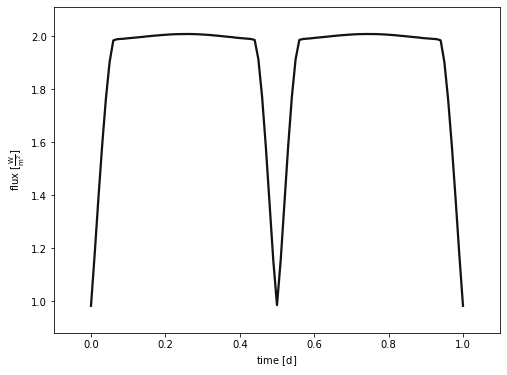

In [39]:
afig, mplfig = b.plot(show=True)

Since these are the only two columns available in the synthetic model, the only other option is to plot in phase instead of time.

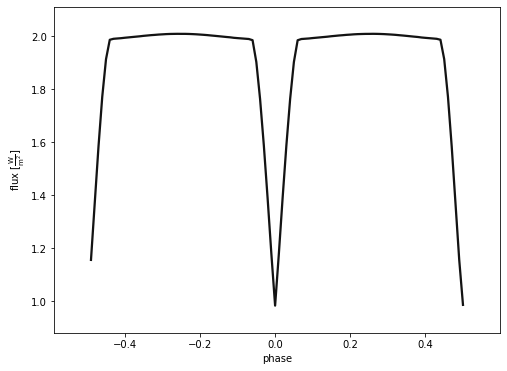

In [40]:
afig, mplfig = b.plot(x='phases', show=True)

In system hierarchies where there may be multiple periods, it is also possible to determine whose period to use for phasing.

In [41]:
print(b.filter(qualifier='period').components)

['primary', 'secondary', 'binary']


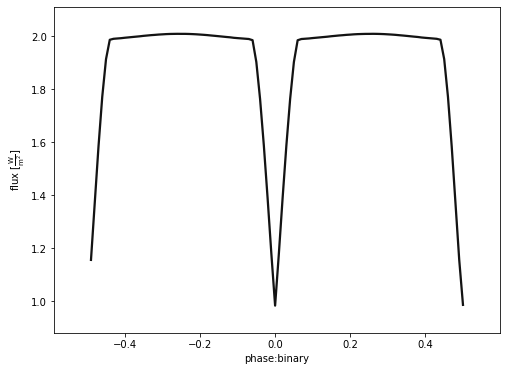

In [42]:
afig, mplfig = b.plot(x='phases:binary', show=True)

Mesh Fields
---------------------

By adding a mesh dataset and setting the columns parameter, light-curve (i.e. passband-dependent) per-element quantities can be exposed and plotted.

Let's add a single mesh at the first time of the light-curve and re-call run_compute

In [43]:
b.add_dataset('mesh', times=[0], dataset='mesh01')

Thu, 17 Sep 2020 11:04 BUNDLE       WARNING mesh dataset uses 'compute_times' instead of 'times', applying value sent as 'times' to 'compute_times'.


<ParameterSet: 83 parameters | contexts: compute, constraint, figure, dataset>

In [44]:
print(b.get_parameter(qualifier='columns').choices)

['volume', 'xs', 'ys', 'zs', 'vxs', 'vys', 'vzs', 'nxs', 'nys', 'nzs', 'us', 'vs', 'ws', 'vus', 'vvs', 'vws', 'nus', 'nvs', 'nws', 'areas', 'loggs', 'teffs', 'rprojs', 'mus', 'visibilities', 'visible_centroids', 'rs', 'intensities@lc01', 'normal_intensities@lc01', 'abs_intensities@lc01', 'abs_normal_intensities@lc01', 'boost_factors@lc01', 'ldint@lc01', 'pblum_ext@lc01', 'abs_pblum_ext@lc01', 'ptfarea@lc01']


In [45]:
b.set_value('columns', value=['intensities@lc01', 
                              'abs_intensities@lc01', 
                              'normal_intensities@lc01', 
                              'abs_normal_intensities@lc01', 
                              'pblum_ext@lc01', 
                              'boost_factors@lc01'])

In [46]:
b.run_compute()

Thu, 17 Sep 2020 11:04 BUNDLE       WARNING overwriting model: latest
100%|██████████| 101/101 [00:01<00:00, 77.77it/s]


<ParameterSet: 25 parameters | kinds: lc, mesh>

In [47]:
print(b.get_model().datasets)

['lc01', 'mesh01']


These new columns are stored with the lc's dataset tag, but with the 'mesh' dataset-kind.

In [48]:
print(b.filter(dataset='lc01', kind='mesh', context='model').twigs)

['00.000000@intensities@primary@lc01@phoebe01@latest@mesh@model', '00.000000@normal_intensities@primary@lc01@phoebe01@latest@mesh@model', '00.000000@abs_intensities@primary@lc01@phoebe01@latest@mesh@model', '00.000000@abs_normal_intensities@primary@lc01@phoebe01@latest@mesh@model', '00.000000@boost_factors@primary@lc01@phoebe01@latest@mesh@model', '00.000000@pblum_ext@primary@lc01@phoebe01@latest@mesh@model', '00.000000@intensities@secondary@lc01@phoebe01@latest@mesh@model', '00.000000@normal_intensities@secondary@lc01@phoebe01@latest@mesh@model', '00.000000@abs_intensities@secondary@lc01@phoebe01@latest@mesh@model', '00.000000@abs_normal_intensities@secondary@lc01@phoebe01@latest@mesh@model', '00.000000@boost_factors@secondary@lc01@phoebe01@latest@mesh@model', '00.000000@pblum_ext@secondary@lc01@phoebe01@latest@mesh@model']


Any of these columns are then available to use as edge or facecolors when plotting the mesh (see the section on the [mesh dataset](MESH)).

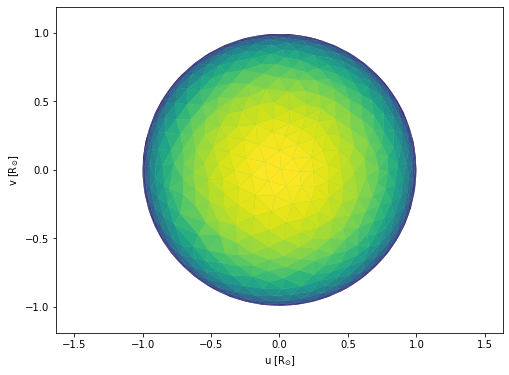

In [49]:
afig, mplfig = b.filter(kind='mesh').plot(fc='intensities', ec='None', show=True)

Now let's look at each of the available fields.

### pblum

For more details, see the tutorial on [Passband Luminosities](pblum)

In [50]:
print(b.get_parameter(qualifier='pblum_ext', 
                      component='primary', 
                      dataset='lc01', 
                      kind='mesh', 
                      context='model'))

Parameter: pblum_ext@primary@latest@model
                       Qualifier: pblum_ext
                     Description: Passband Luminosity of entire star (after pblum scaling)
                           Value: 12.638505526584439 W
                  Constrained by: 
                      Constrains: None
                      Related to: None



`pblum_ext` is the *extrinsic* passband luminosity of the entire star/mesh - this is a single value (unlike most of the parameters in the mesh) and does not have per-element values.

### abs_normal_intensities

In [51]:
print(b.get_parameter(qualifier='abs_normal_intensities', 
                      component='primary', 
                      dataset='lc01', 
                      kind='mesh', 
                      context='model'))

Parameter: abs_normal_intensities@primary@latest@model
                       Qualifier: abs_normal_intensities
                     Description: Per-element value of abs_normal_intensities for lc01 dataset
                           Value: [4.29459195e+13 4.29476393e+13 4.29458145e+13 ... 4.19353759e+13
 4.19285231e+13 4.19559313e+13] W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



`abs_normal_intensities` are the absolute normal intensities per-element.

### normal_intensities

In [52]:
print(b.get_parameter(qualifier='normal_intensities', 
                      component='primary', 
                      dataset='lc01', 
                      kind='mesh', 
                      context='model'))

Parameter: normal_intensities@primary@latest@model
                       Qualifier: normal_intensities
                     Description: Per-element value of normal_intensities for lc01 dataset
                           Value: [8.28012159e-12 8.28045318e-12 8.28010134e-12 ... 8.08528530e-12
 8.08396406e-12 8.08924844e-12] W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



`normal_intensities` are the relative normal intensities per-element.

### abs_intensities

In [53]:
print(b.get_parameter(qualifier='abs_intensities', 
                      component='primary', 
                      dataset='lc01', 
                      kind='mesh', 
                      context='model'))

Parameter: abs_intensities@primary@latest@model
                       Qualifier: abs_intensities
                     Description: Per-element value of abs_intensities for lc01 dataset
                           Value: [4.29451532e+13 4.29468577e+13 4.29450482e+13 ...            nan
            nan            nan] W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



`abs_intensities` are the projected absolute intensities (towards the observer) per-element.

### intensities

In [54]:
print(b.get_parameter(qualifier='intensities', 
                      component='primary', 
                      dataset='lc01', 
                      kind='mesh', 
                      context='model'))

Parameter: intensities@primary@latest@model
                       Qualifier: intensities
                     Description: Per-element value of intensities for lc01 dataset
                           Value: [8.27997385e-12 8.28030249e-12 8.27995360e-12 ...            nan
            nan            nan] W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



`intensities` are the projected relative intensities (towards the observer) per-element.

### boost_factors

In [55]:
print(b.get_parameter(qualifier='boost_factors', 
                      component='primary', 
                      dataset='lc01', 
                      kind='mesh', 
                      context='model'))

Parameter: boost_factors@primary@latest@model
                       Qualifier: boost_factors
                     Description: Per-element value of boost_factors for lc01 dataset
                           Value: [1. 1. 1. ... 1. 1. 1.]
                  Constrained by: 
                      Constrains: None
                      Related to: None



`boost_factors` are the boosting amplitudes per-element.  See the [boosting tutorial](./beaming_boosting.ipynb) for more details.